### Importing libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read data

In [2]:
df = pd.read_csv("../data/business/insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
print(df.shape)

(1338, 7)


### Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
print("\nUnique Values: \n",df.nunique())
print("\nMissing Values: ", df.isnull().sum().values.sum())


Unique Values: 
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Missing Values:  0


In [10]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


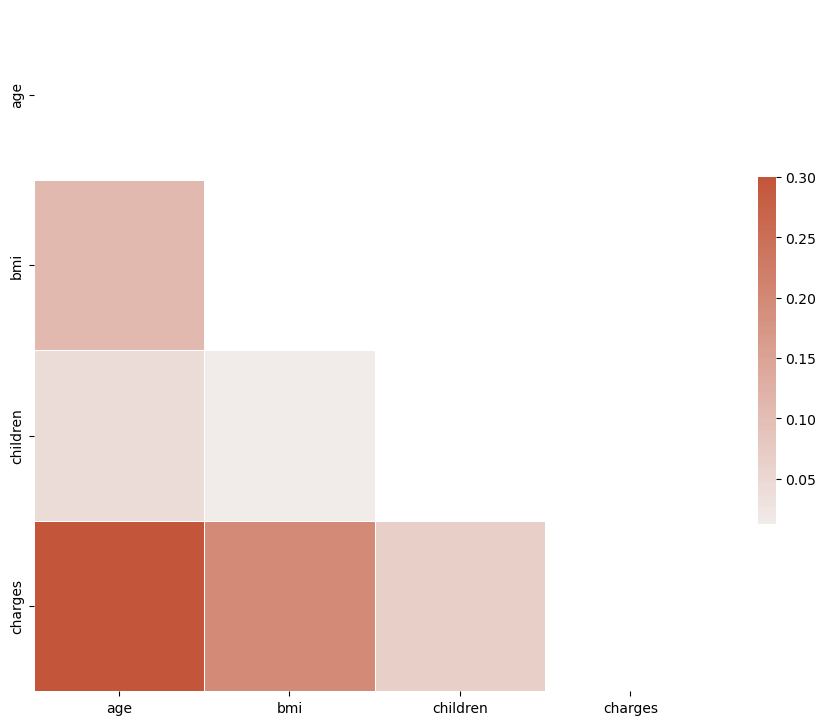

In [12]:
corr = df.corr()
# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

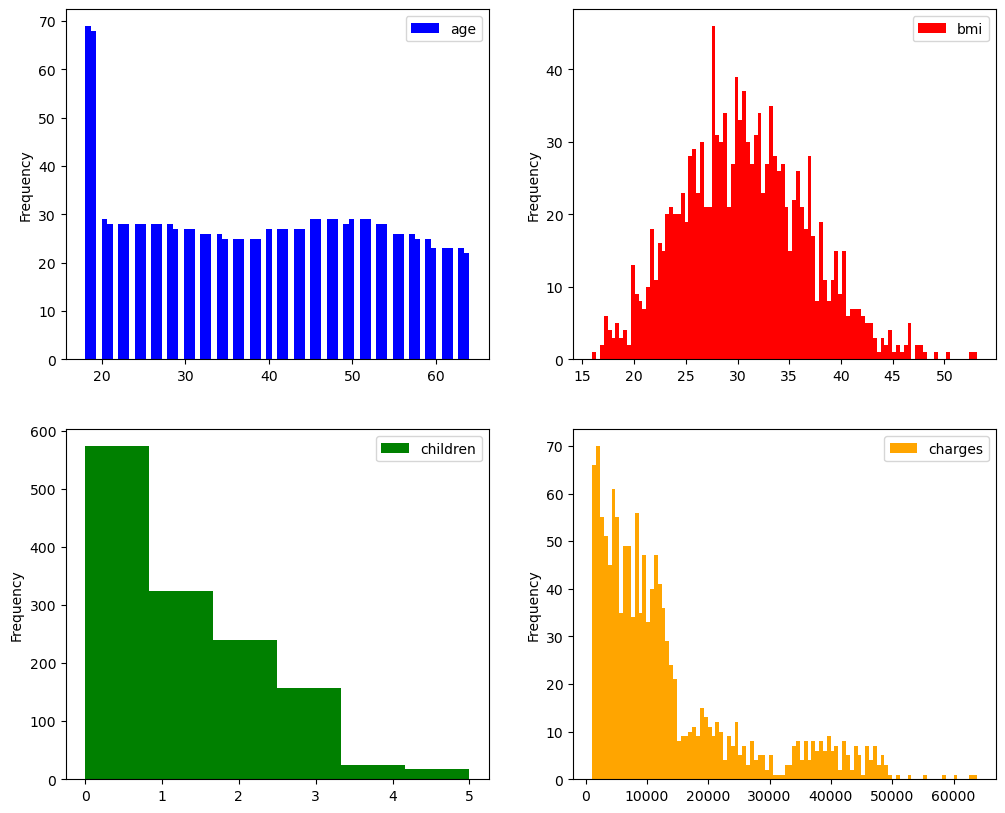

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="charges", bins=100, color="orange", ax=axes[1][1])
plt.show()

<AxesSubplot:>

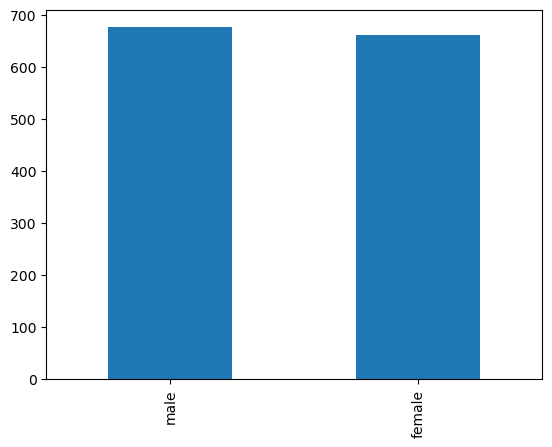

In [14]:
df['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

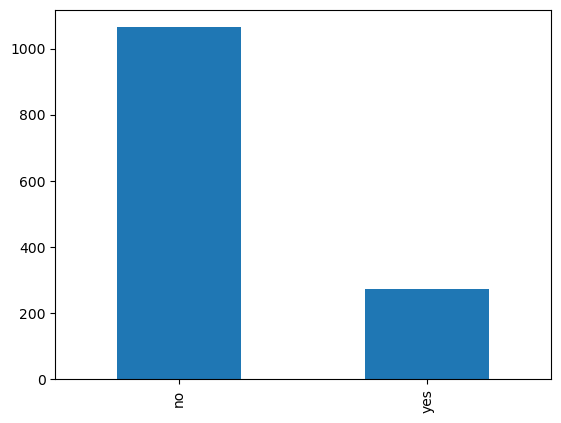

In [15]:
df['smoker'].value_counts().plot(kind='bar')

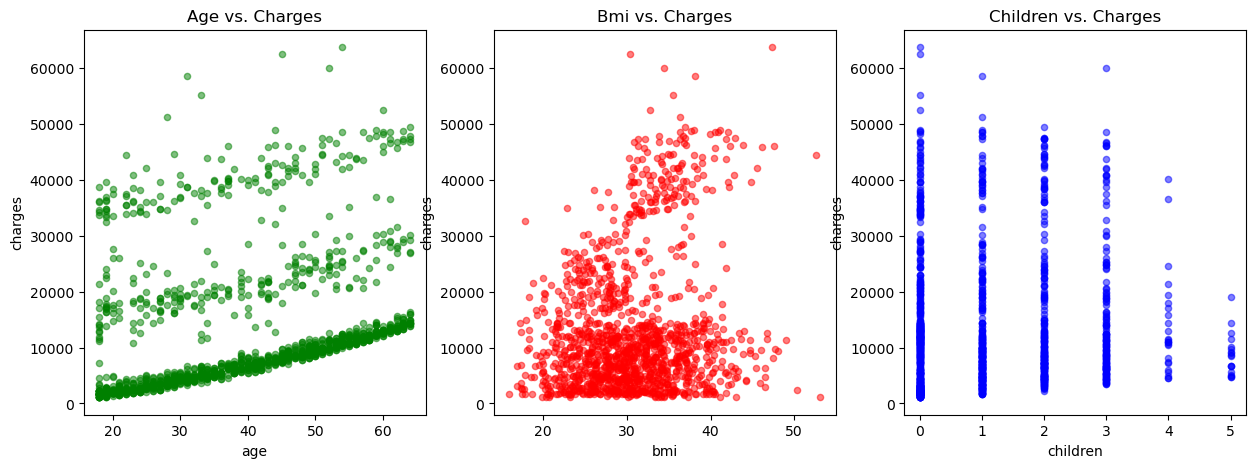

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
df.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="Bmi vs. Charges")
df.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

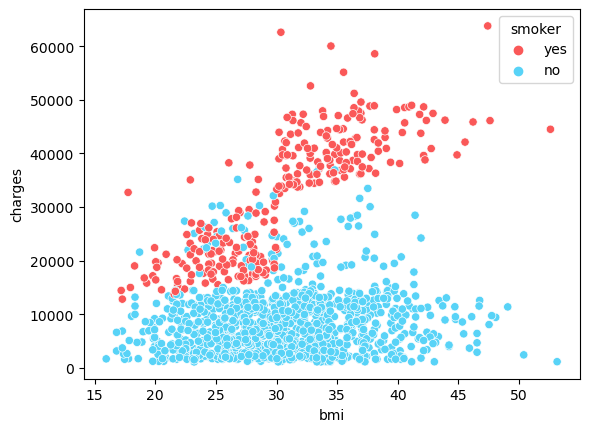

In [19]:
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="bmi", y="charges", data=df, palette=pal, hue='smoker')

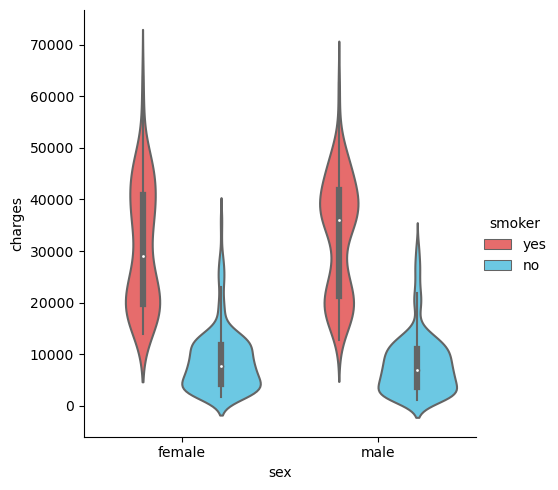

In [20]:
pal = ["#FA5858", "#58D3F7"]
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = pal)

Text(0.5, 1.0, 'Smokers')

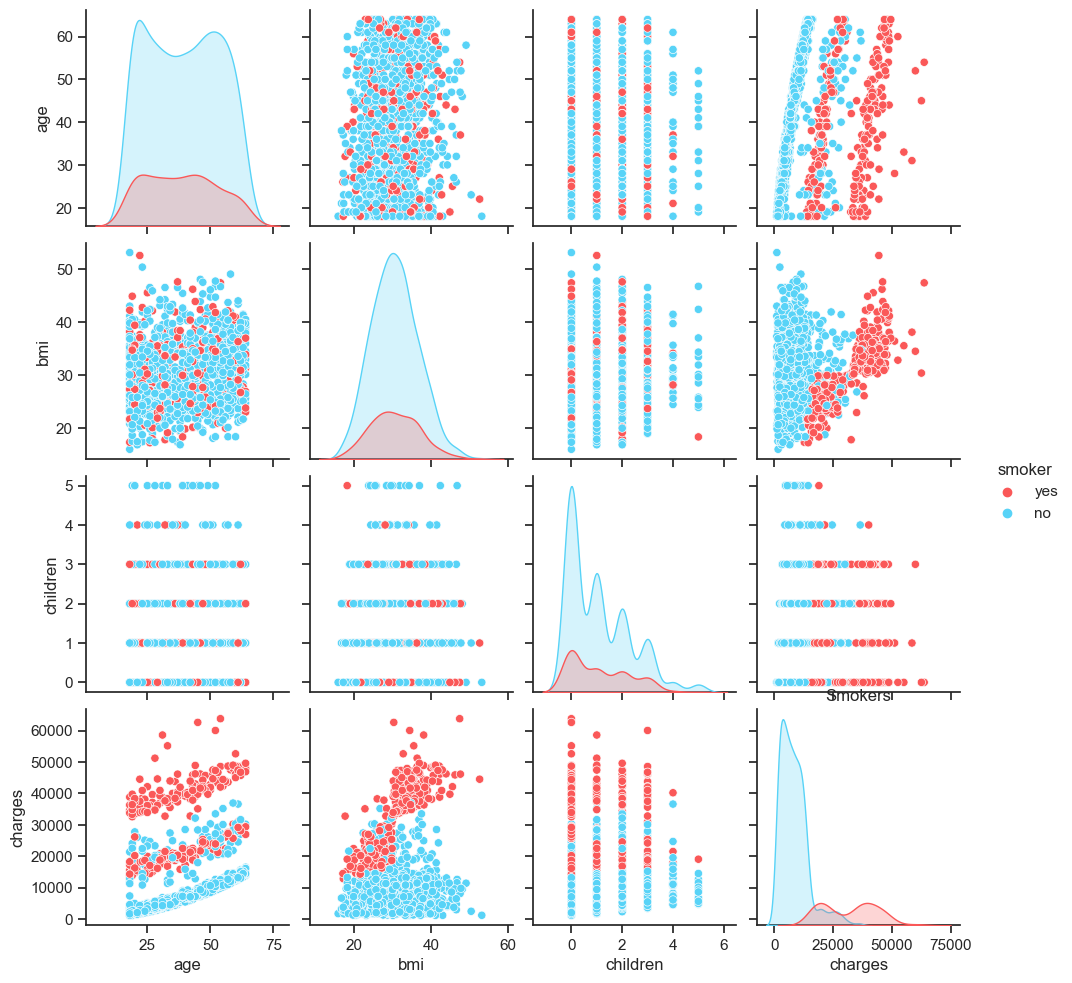

In [21]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

## Machine learning (regression)

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
X = df.drop(["charges"],axis=1)
y = df.charges.values

In [45]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [50]:
# Separate features into numerical and categorical
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
# Create a new transformer for binary features
binary_features = ['sex', 'smoker']

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('labelencoder', OneHotEncoder(sparse=False))])

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Deal with any missing values
    ('scaler', StandardScaler())])  # Standardize features by removing the mean and scaling to unit variance

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Deal with any missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One hot encode the categorical variables

# Update the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features.drop(binary_features)),  # drop binary features from here
        ('binary', binary_transformer, binary_features)],  # new transformer for binary features
    remainder='passthrough')  # To keep any other columns not specified

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Testing Random Forest Regressor

In [52]:
# Create a pipeline that does the necessary preprocessing and then runs the RandomForestRegressor
model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=400, max_depth=5, random_state=0))

In [53]:
# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [54]:
# Calculate RMSE on train and test data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R2 score on train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {rmse_train:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')
print(f'Train R^2 Score: {r2_train:.2f}')
print(f'Test R^2 Score: {r2_test:.2f}')


Train RMSE: 4126.85
Test RMSE: 4014.71
Train R^2 Score: 0.88
Test R^2 Score: 0.90


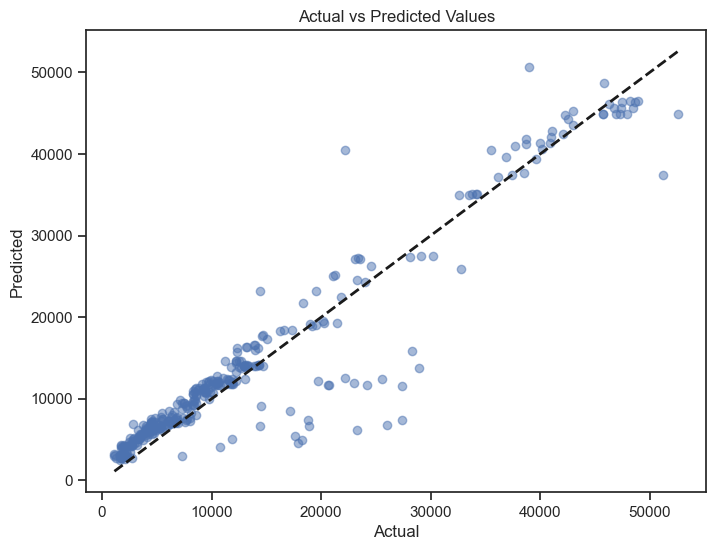

In [55]:
# Create a scatter plot with a linear line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

### Testing Gradient Boosting Regressor

In [58]:
# Append classifier to preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(random_state=0))])

Train RMSE: 3805.99
Test RMSE: 4038.10
Train R^2 Score: 0.90
Test R^2 Score: 0.90


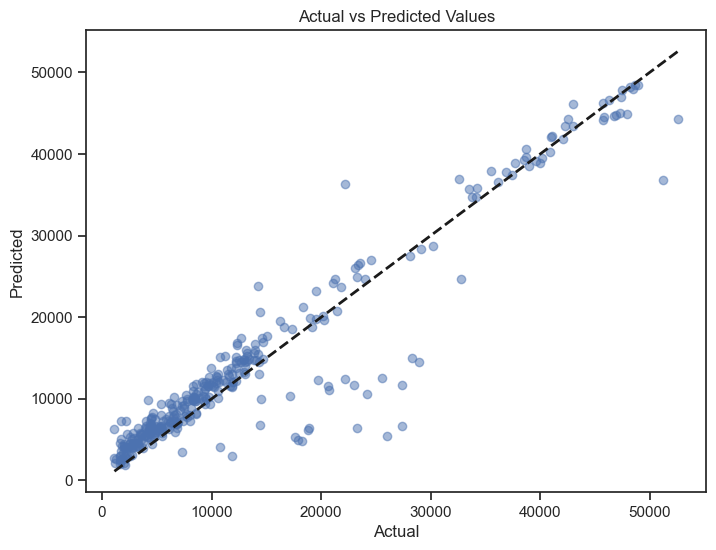

In [59]:
model.fit(X_train, y_train)
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Calculate RMSE on train and test data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R2 score on train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {rmse_train:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')
print(f'Train R^2 Score: {r2_train:.2f}')
print(f'Test R^2 Score: {r2_test:.2f}')
# Create a scatter plot with a linear line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

### Fine tuning the regressor model

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gradientboostingregressor__n_estimators': [100, 200,300,400,500],
              'gradientboostingregressor__learning_rate': [0.1, 0.05, 0.01,0.005,0.001],
              'gradientboostingregressor__max_depth': [2,3, 4, 5,6]}

pipeline = make_pipeline(preprocessor, GradientBoostingRegressor())
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__max_depth': 2, 'gradientboostingregressor__n_estimators': 100}


Train RMSE: 4321.07
Test RMSE: 3931.02
Train R^2 Score: 0.87
Test R^2 Score: 0.90


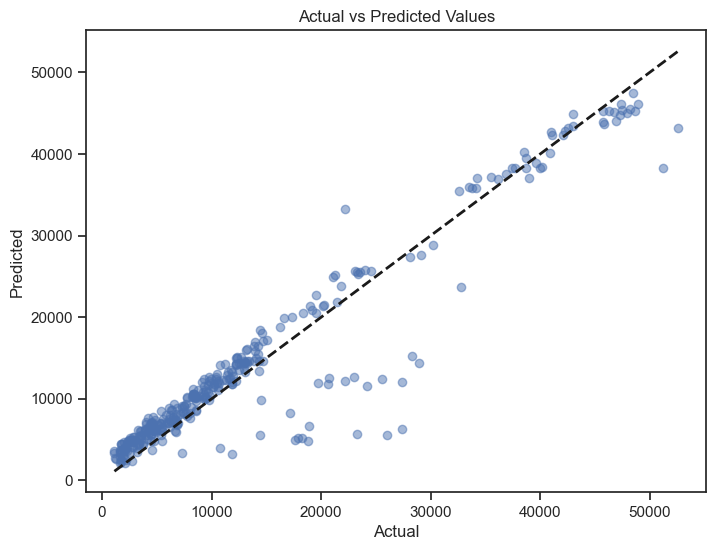

In [66]:
# Creating new GradientBoostingRegressor with the best parameters
best_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=2, n_estimators=100, random_state=0)
# Inserting the best model into the pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', best_gbr)])
model.fit(X_train, y_train)
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Calculate RMSE on train and test data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R2 score on train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {rmse_train:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')
print(f'Train R^2 Score: {r2_train:.2f}')
print(f'Test R^2 Score: {r2_test:.2f}')
# Create a scatter plot with a linear line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

### Testing on a new data sample

In [68]:
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data.head()

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [71]:
predicted_charge = model.predict(input_data)
print("predicted charge: ", predicted_charge)

predicted charge:  [5562.6249905]
